Research Question 1: What impact does age have on baseball performance for players of the Chicago Cubs? A linear regression was run on runs, hits, doubles, triples, and home runs. A boxplot was created for home runs and age, to see if a linear relationship existed (age 31 was found to have the most home runs on average, which served as the limitus age for the t-test). Finally, a t-test was run to see if there is statistical significance between two age groups: under 31 years, and at 31 or over 31 years. 

In [1]:
# Import libaries and dependencies #
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data & convert to dataframe
batting_data_load = "../Project_01/CHC_batting.csv"
batting_data = pd.read_csv(batting_data_load)
batting_data.head()

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Yan Gomes,35,116,419,382,44,102,...,0.723,93,156,9,9,0,7,1,Right,No
1,2,2023,1B,Trey Mancini,31,79,263,235,31,55,...,0.635,71,79,5,2,0,3,1,Right,No
2,3,2023,2B,Nico Hoerner,26,150,688,619,98,175,...,0.729,97,237,12,14,1,5,0,Right,No
3,4,2023,SS,Dansby Swanson,29,147,638,565,81,138,...,0.744,99,235,9,5,0,2,0,Right,No
4,5,2023,3B,Nick Madrigal,26,92,294,270,34,71,...,0.663,79,95,3,9,5,0,0,Right,No


In [3]:
# Import data & convert to dataframe
pitching_data_load = "../Project_01/CHC_pitching.csv"
pitching_data = pd.read_csv(pitching_data_load)
pitching_data.head()

,Rank,Year,Position,Name,Age,Wins,Losses,Winning_Percentage,Earned_Run_Average,Games_Played,...,Adjusted_Earned_Run_Average,Fielding_Independent_Pitching,Walks_Hits_Per_Inning_Pitched,Hits_Per_Nine_Innings,Home_Runs_Per_Nine_Innings,Walks_Per_Nine_Innings,Strikeouts_Per_Nine_Innings,Strikeout_Walk_Ratio,Dominant_Hand,Switch_Hitter
0,1,2023,SP,Justin Steele,27,16,5,0.762,3.06,30,...,146,3.02,1.171,8.7,0.7,1.9,9.1,4.89,Left,No
1,2,2023,SP,Jameson Taillon,31,8,10,0.444,4.84,30,...,93,4.61,1.276,9.1,1.6,2.4,8.2,3.41,Right,No
2,3,2023,SP,Drew Smyly,34,11,11,0.500,5.00,41,...,90,4.96,1.426,9.3,1.6,3.5,8.9,2.52,Left,No
3,4,2023,SP,Kyle Hendricks,33,6,8,0.429,3.74,24,...,120,3.81,1.204,9.1,0.9,1.8,6.1,3.44,Right,No
4,5,2023,SP,Marcus Stroman,32,10,9,0.526,3.95,27,...,113,3.58,1.259,7.9,0.6,3.4,7.8,2.29,Right,No


In [4]:
# Explore data

print("General info about batting:")
print(batting_data.shape)
print(batting_data.columns)
print(batting_data.dtypes)

print("General info about pitching:")
print(pitching_data.shape)
print(pitching_data.columns)
pitching_data.dtypes

General info about batting:
(5241, 31)
Index(['Rank', 'Year', 'Position', 'Name', 'Age', 'Games', 'Plate_Appearances',
       'At_Bats', 'Runs', 'Hits', 'Doubles', 'Triples', 'Home_Runs',
       'Runs_Batted_In', 'Stolen_Bases', 'Caught_Stealing', 'Base_On_Balls',
       'Strikeouts', 'Batting_Average', 'On_Base_Percentage',
       'Slugging_Percentage', 'On_Base_Plus_Slugging_Percentage',
       'On_Base_Plus_Slugging_Percentage_Plus', 'Total_Bases',
       'Double_Plays_Grounded_Into', 'Times_Hit_By_Pitch', 'Sacrifice_Hits',
       'Sacrifice_Flies', 'Intentional_Bases_on_Balls', 'Dominant_Hand',
       'Switch_Hitter'],
      dtype='object')
Rank                                       int64
Year                                       int64
Position                                  object
Name                                      object
Age                                        int64
Games                                      int64
Plate_Appearances                          int64
At_B

Rank                               int64
Year                               int64
Position                          object
Name                              object
Age                                int64
Wins                               int64
Losses                             int64
Winning_Percentage               float64
Earned_Run_Average               float64
Games_Played                       int64
Games_Started                      int64
Games_Finished                     int64
Complete_Games                     int64
Shutouts                           int64
Saves                              int64
Innings_Pitched                  float64
Hits_Allowed                       int64
Runs_Allowed                       int64
Earned_Runs                        int64
Home_Runs_Allowed                  int64
Walks_Allowed                      int64
Intentional_Walks_Allowed          int64
Strikeouts                         int64
Hit_By_Pitch                       int64
Balks           

In [5]:
# Convert object to string
batting_data['Position'] = batting_data['Position'].astype("string")
print(batting_data['Position'].dtype)

string


In [6]:
# Convert object to string
pitching_data['Dominant_Hand'] = pitching_data['Dominant_Hand'].astype("string")
print(pitching_data['Dominant_Hand'].dtype)

string


In [7]:
# Check for missing values, duplicates, etc
print(batting_data.isna().sum())                # shows as 0 here but has nans in bar chart below (for Position column)
print(pitching_data.isna().sum())

Rank                                      0
Year                                      0
Position                                 78
Name                                      0
Age                                       0
Games                                     0
Plate_Appearances                         0
At_Bats                                   0
Runs                                      0
Hits                                      0
Doubles                                   0
Triples                                   0
Home_Runs                                 0
Runs_Batted_In                            0
Stolen_Bases                              0
Caught_Stealing                           0
Base_On_Balls                             0
Strikeouts                                0
Batting_Average                           0
On_Base_Percentage                        0
Slugging_Percentage                       0
On_Base_Plus_Slugging_Percentage          0
On_Base_Plus_Slugging_Percentage

In [8]:

batting_data["Position"].unique()

<StringArray>
[ 'C', '1B', '2B', 'SS', '3B', 'LF', 'CF', 'RF', 'DH', 'CI', 'OF',  'P', 'UT',
 'IF', 'MI', <NA>]
Length: 16, dtype: string

In [9]:
# duplicates: Since the players are listed by rank, each player should only appear once per year. 
# It appears there aren't any duplicates.

len(batting_data["Name"].value_counts())

2219

In [10]:
#Checking and printing for any duplicate players
duplicate_players = batting_data.loc[batting_data.duplicated(['Name','Year']), "Name"].unique()
print(duplicate_players)

[]


In [11]:
#Filtering players for batting data - dropping any players who had less than 50 "at bats" to clean the data.
filtered_players = batting_data[batting_data['At_Bats'] >= 50]
filtered_players

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Yan Gomes,35,116,419,382,44,102,...,0.723,93,156,9,9,0,7,1,Right,No
1,2,2023,1B,Trey Mancini,31,79,263,235,31,55,...,0.635,71,79,5,2,0,3,1,Right,No
2,3,2023,2B,Nico Hoerner,26,150,688,619,98,175,...,0.729,97,237,12,14,1,5,0,Right,No
3,4,2023,SS,Dansby Swanson,29,147,638,565,81,138,...,0.744,99,235,9,5,0,2,0,Right,No
4,5,2023,3B,Nick Madrigal,26,92,294,270,34,71,...,0.663,79,95,3,9,5,0,0,Right,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,6,1876,OF,Bob Addy,34,32,147,142,36,40,...,0.630,102,46,0,0,0,0,0,Left,No
5236,7,1876,OF,John Glenn,26,66,288,276,55,84,...,0.685,120,97,0,0,0,0,0,Right,No
5237,8,1876,OF,Paul Hines,21,64,306,305,62,101,...,0.773,146,134,0,0,0,0,0,Right,No
5238,9,1876,OF,Oscar Bielaski,29,32,141,139,24,29,...,0.450,44,32,0,0,0,0,0,Right,No


In [14]:
#Creating new columns ( averages across games for: Home Runs, Doubles, Tiples, Hits, Runs) in the DataFrame for average homeruns per game

filtered_players['homerun_per_game'] = filtered_players['Home_Runs'] / filtered_players['Games']
filtered_players['doubles_per_game'] = filtered_players['Doubles'] / filtered_players['Games']
filtered_players['triples_per_game'] = filtered_players['Triples'] / filtered_players['Games']
filtered_players['hits_per_game'] = filtered_players['Hits'] / filtered_players['Games']
filtered_players['runs_per_game'] = filtered_players['Runs'] / filtered_players['Games']

# Display the updated DataFrame
print(filtered_players)

      Rank  Year Position            Name  Age  Games  Plate_Appearances  \
0        1  2023        C       Yan Gomes   35    116                419   
1        2  2023       1B    Trey Mancini   31     79                263   
2        3  2023       2B    Nico Hoerner   26    150                688   
3        4  2023       SS  Dansby Swanson   29    147                638   
4        5  2023       3B   Nick Madrigal   26     92                294   
...    ...   ...      ...             ...  ...    ...                ...   
5235     6  1876       OF        Bob Addy   34     32                147   
5236     7  1876       OF      John Glenn   26     66                288   
5237     8  1876       OF      Paul Hines   21     64                306   
5238     9  1876       OF  Oscar Bielaski   29     32                141   
5240    11  1876        P     Al Spalding   25     66                298   

      At_Bats  Runs  Hits  ...  Sacrifice_Hits  Sacrifice_Flies  \
0         382    44 

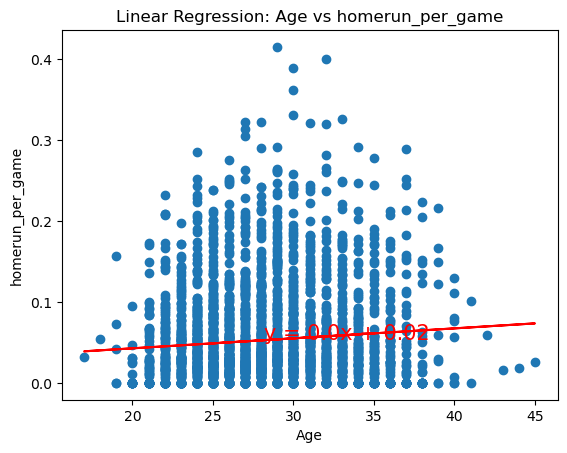

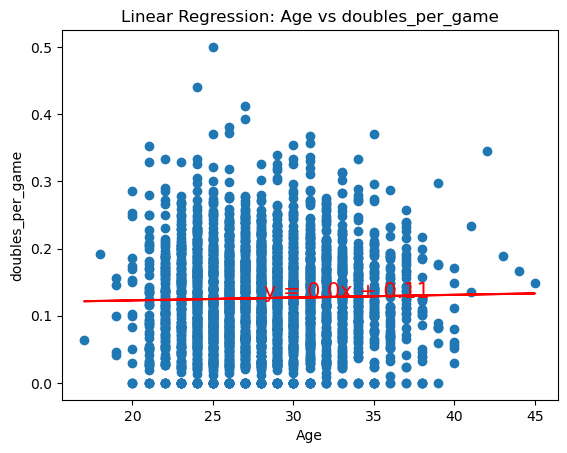

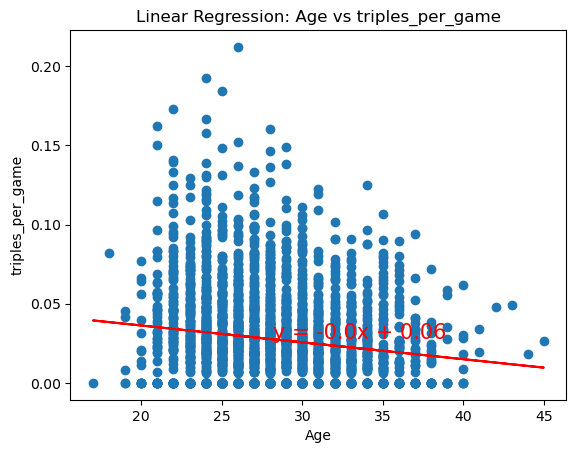

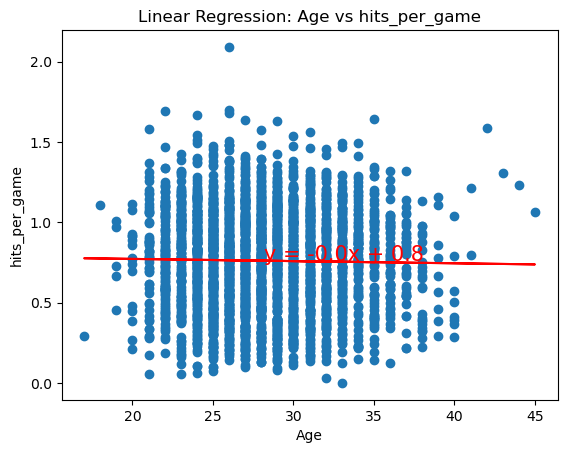

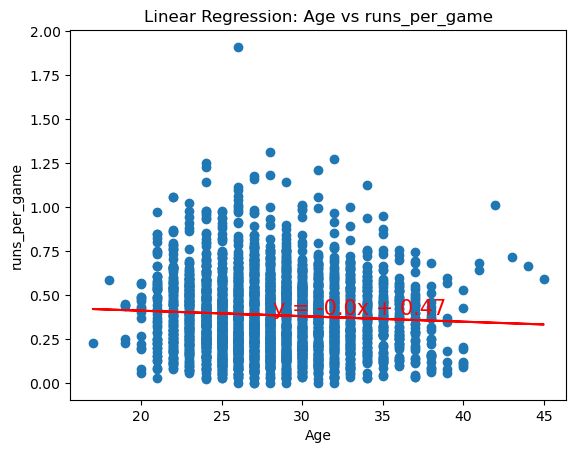

In [15]:
#Linear regressions - looking at age versus the following variables: runs, hits, doubles, triples, and home runs

def linear_regression_plot(x, y, xlabel, ylabel):
    slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, (x.mean(), y.mean()), fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Linear Regression: {xlabel} vs {ylabel}')
    plt.show()

columns_age_regress = ["homerun_per_game", "doubles_per_game", "triples_per_game", "hits_per_game", "runs_per_game"]

# Define the filter condition (e.g., filtered players less than 50 at bats) - already done above.
#filtered_players = batting_data[batting_data['At_Bats'] >= 50]

# Apply linear regression only to rows that meet the filter condition
for column in columns_age_regress:
    linear_regression_plot(filtered_players["Age"],filtered_players[column], "Age", column)



When measured against age, for the linear regressions, there is a slight positive correlation for home runs per game. There is no correlation for doubles and hits per game. There is a slight negative correlation for triples and runs per game.

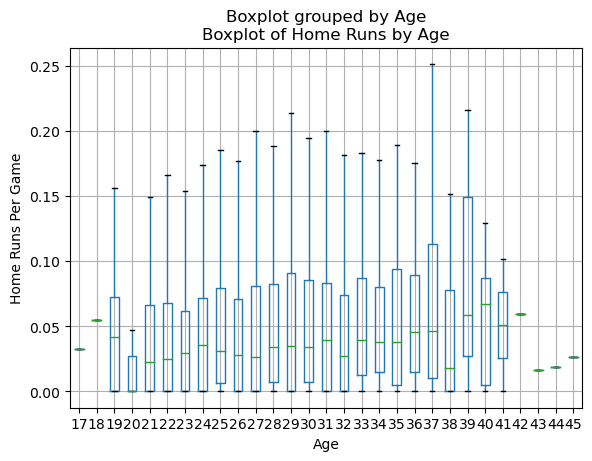

In [13]:
#create a boxplot to see if there is a nonlinear relationship between age and home runs

#"Age" and "homerun_per_game" columns are present in the DataFrame
# If not, replace them with the actual column names
filtered_players.boxplot(column='homerun_per_game', by='Age', showfliers=False)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Home Runs Per Game')
plt.title('Boxplot of Home Runs by Age')

# Show the plot
plt.show()


For the box plot, there is a no linear relationship. Age 31 will be used as a cut off number for running an independent t-test.

In [17]:
#running a t-test on age (under versus over 31 years) and home runs to see if there is any statsitical significance
filtered_age_1 = filtered_players[filtered_players['Age'] >= 31]["homerun_per_game"]
filtered_age_2 = filtered_players[filtered_players['Age'] < 31]["homerun_per_game"]

t_stat, p_value = st.ttest_ind(filtered_age_1, filtered_age_2)

print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print('The difference is statistically significant.')
else:
    print('The difference is not statistically significant.')

#There is a slight statistical significance 

T-Statistic: 2.6006995422141905
P-Value: 0.009353528763191279
The difference is statistically significant.


For the independent t-test, which looks at two age groups (up to age 31, and then age 31 and over) within homeruns per game, there is a slight statistical signifance, which makes sense as the linear regression of age and homeruns per game showed a slight positive correlation.

When looking at home runs per game, as an impact indicator of performance based on age, we are able to reject the null hypothesis that age does not have an impact on player performance. 